# Problem Statement
Data Analytics II 
1. Implement logistic regression using Python/R to perform
 classification on Social_Network_Ads.csv dataset.
2. Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate,
Precision,
Recall on the given dataset.


In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df = pd.read_csv("Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [27]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [28]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [29]:
# Label Encoding
df['Gender'].replace({'Female':0,'Male':1},inplace=True)

In [30]:
df.sample(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
214,15622478,1,47,43000,0
123,15574305,1,35,53000,0
166,15762228,0,22,55000,0
168,15789815,1,29,148000,1
335,15601550,0,36,54000,0


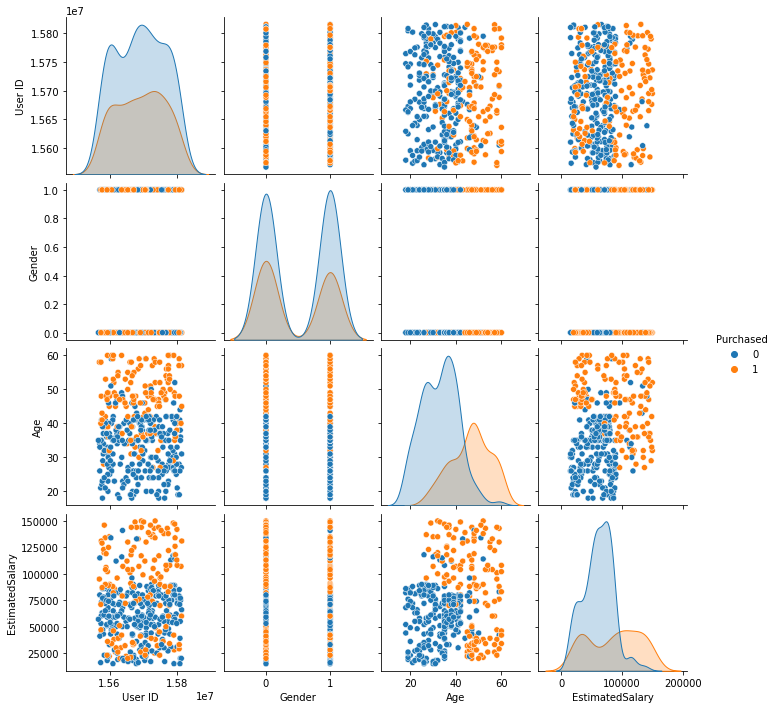

In [31]:
# Visualising Dataset
sns.pairplot(df,hue='Purchased')
plt.show()

In [32]:
# Separating input and target data
x = df.drop('Purchased',axis=1)
y = df['Purchased']

In [33]:
# Splitting dataset into train, test, split
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)

In [34]:
# Scaling dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

xtrain = scaler.fit_transform(xtrain)
xtest  = scaler.transform(xtest)

In [35]:
# Training Model
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(xtrain,ytrain)

y_pred = clf.predict(xtest)


In [36]:
# Accuracy of classifier
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest,y_pred))

0.8375


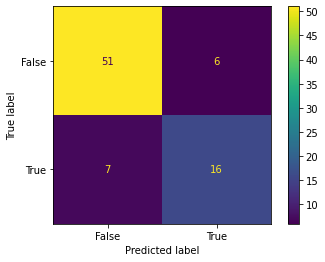

In [37]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(ytest,y_pred)

confusion_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=[False,True])

confusion_display.plot()
plt.show()

In [39]:
# Calculate precision, recall, F1-score and Error-rate
TN,FP,FN,TP = confusion_matrix.ravel()

precision = TP / (TP + FP)
recall = TP /  (TP + FN)
f1_score = (2 * (precision * recall)) / (precision + recall)
error_rate = (FP + FN) / (TN + FP + FN + TP)

print(f"True Negatives: {TN}")
print(f"False Positives: {FP}")
print(f"False Negatives: {FN}")
print(f"True Positives: {TP}")
print('\n')
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1_score}")
print(f"Error Rate: {error_rate}")

True Negatives: 51
False Positives: 6
False Negatives: 7
True Positives: 16


Precision: 0.7272727272727273
Recall: 0.6956521739130435
F1 Score: 0.711111111111111
Error Rate: 0.1625


In [40]:
print(metrics.classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.89      0.89        57
           1       0.73      0.70      0.71        23

    accuracy                           0.84        80
   macro avg       0.80      0.80      0.80        80
weighted avg       0.84      0.84      0.84        80

